In [2]:
import json
import numpy as np
import re
import string
from gensim.models import KeyedVectors
from pyvi import ViTokenizer

In [3]:
with open("./QAsys/data/train.json") as file:
    data = json.load(file)
len(data)

11518

In [4]:
questions = []
answers = []
labels = []
for case in data:
    questions.append(case["question"])
    answers.append(case["text"])
    labels.append(case["label"])

In [14]:
true = 0
false = 0
for i in range(len(labels)):
    if labels[i] == True:
        true += 1
    else:
        false += 1
print("True samples in train set {}/{}".format(true, len(labels)))



True samples in train set 4606/11518


Text(0.5, 0, 'Length')

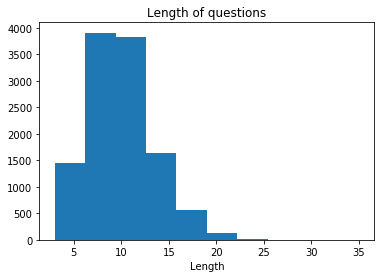

In [17]:
len_questions = [len(x.split(" ")) for x in questions]
len_answers = [len(x.split(" ")) for x in answers]
import matplotlib.pyplot as plt
plt.hist(len_questions)
plt.title('Length of questions')
plt.xlabel('Length')

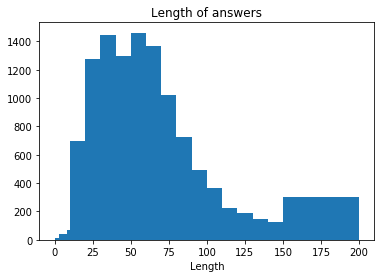

In [18]:
plt.hist(len_answers, bins = [0,3,5,7,8,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,200])
plt.title('Length of answers')
plt.xlabel('Length')
plt.show()

In [40]:
import string

def convertNumbers(sentence):
    convert_dict = {'0': u' không ',
                    '1': u' một ',
                    '2': u' hai ',
                    '3': u' ba ',
                    '4': u' bốn ',
                    '5': u' năm ',
                    '6': u' sáu ',
                    '7': u' bảy ',
                    '8': u' tám ',
                    '9': u' chín '
                    }
    result = ""
    for char in sentence:
        if char in convert_dict:
            result += convert_dict[char]
        else:
            result += char
    return result

def preprocess_sentence(sentence):
    result = sentence.lower()
    result = result.translate(str.maketrans('', '', string.punctuation))
    result = convertNumbers(result)
    result = " ".join(result.split())
    return result

In [48]:
import sys
for i in range(len(questions)):
    questions[i] = preprocess_sentence(questions[i])
    answers[i] = preprocess_sentence(answers[i])
    
train_questions = []
train_answers = []
for i in range(len(questions)):
    train_questions.append(ViTokenizer.tokenize(questions[i]).split())
    train_answers.append(ViTokenizer.tokenize(answers[i]).split())

In [50]:
len_tokens_questions = [len(x) for x in train_questions]
len_tokens_answers = [len(x) for x in train_answers]

Text(0, 0.5, 'Length')

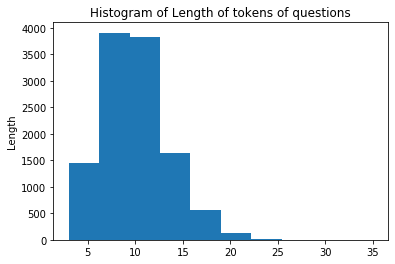

In [72]:
plt.hist(len_questions)
plt.title('Histogram of Length of tokens of questions')
plt.ylabel('Length')


Text(0, 0.5, 'Length')

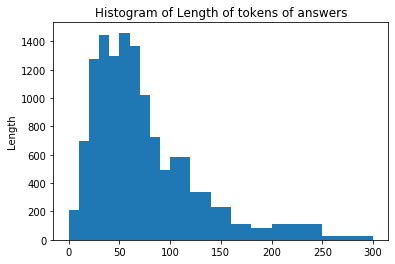

In [73]:
plt.hist(len_answers, bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200, 250,300])
plt.title('Histogram of Length of tokens of answers')
plt.ylabel('Length')


In [66]:
word2vec = KeyedVectors.load_word2vec_format('./backbones/baomoi.model.bin', binary=True)


array([[ 1.2208935 , -1.9759346 , -2.302987  , ..., -0.7717542 ,
         4.413171  ,  2.0625925 ],
       [-0.5468536 , -2.128617  ,  3.319674  , ..., -0.71189725,
        -3.0387068 , -0.281412  ],
       [-0.8814445 , -1.9335303 ,  1.9944925 , ...,  0.58494353,
         3.5710359 ,  0.6534005 ],
       ...,
       [ 0.8379983 , -1.3142704 , -0.6626488 , ..., -1.1109332 ,
        -0.33079302,  1.3191683 ],
       [ 0.28009018,  1.1195608 , -0.7338648 , ...,  3.6615975 ,
        -0.45417595, -1.7422245 ],
       [-0.42827654, -2.2992845 , -1.73215   , ...,  0.6058119 ,
         0.84054804,  0.9954988 ]], dtype=float32)

In [71]:
t = word2vec[train_questions[0]]
t

array([[ 0.04340091, -0.5618748 , -1.0432632 , ..., -1.3564956 ,
         1.11348   ,  0.66298574],
       [ 0.02601759, -1.6084557 ,  0.7561448 , ..., -4.554989  ,
        -1.2670665 ,  0.762465  ],
       [ 1.1120932 , -2.1533458 , -1.0027261 , ...,  1.3572319 ,
        -2.0474346 ,  1.8641253 ],
       ...,
       [-1.3179561 , -3.8771944 ,  0.5683352 , ..., -0.18087955,
         0.12403365,  0.22700116],
       [ 0.04340091, -0.5618748 , -1.0432632 , ..., -1.3564956 ,
         1.11348   ,  0.66298574],
       [-0.96256435,  4.300559  , -3.9244041 , ..., -0.7608068 ,
         0.17696989,  3.65788   ]], dtype=float32)

In [69]:
max(len_answers)

676